In [43]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
#무방향성 그래프 => undirected graph
G.add_edges_from([('A','B'),('A','C'),('B','D'),('B','E'),('C','F'),('C','G')])

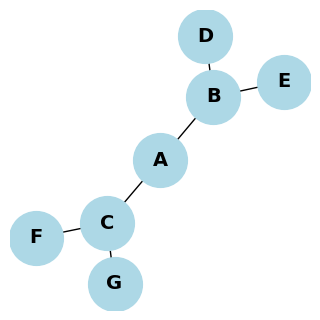

In [44]:
plt.figure(figsize=(3,3))
pos = nx.spring_layout(G,seed=42)
nx.draw(G,pos,
        with_labels=True,
        node_size=1500,
        node_color = 'lightblue',
        font_size = 14,
        font_weight='bold')
plt.show()

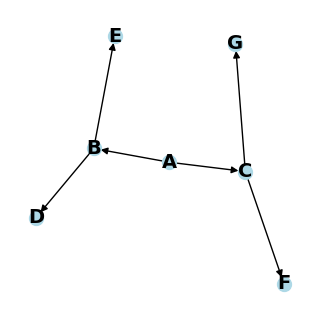

In [45]:
#방향성 그래프 = directed graph
DG = nx.DiGraph()
DG.add_edges_from([('A','B'),('A','C'),('B','D'),('B','E'),('C','F'),('C','G')])
pos = nx.spring_layout(DG,seed=40)
plt.figure(figsize=(3,3))
nx.draw(DG,pos,
        with_labels=True,
        node_size=100,
        node_color = 'lightblue',
        font_size = 14,
        font_weight='bold')
plt.show()

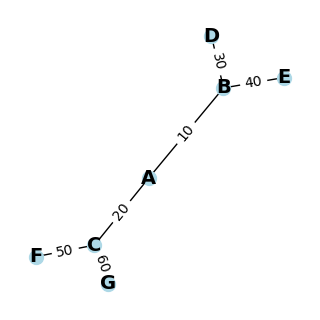

In [46]:
#가중치가 있는 그래프 = 네트워크
WG = nx.Graph()
WG.add_edges_from([('A','B',{'weight':10}),('A','C',{'weight':20}),('B','D',{'weight':30}),('B','E',{'weight':40}),
                   ('C','F',{'weight':50}),('C','G',{'weight':60})])
labels = nx.get_edge_attributes(WG,'weight')

plt.figure(figsize=(3,3))
pos = nx.spring_layout(WG,seed=42)
nx.draw(WG,pos,
        with_labels=True,
        node_size=100,
        node_color = 'lightblue',
        font_size = 14,
        font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels) #가중치 엣지 따로 그려주기.
plt.show()


In [47]:
#그래프의 연결성 확인
print(nx.is_connected(WG))

True


In [48]:
#그래프의 차수 확인
DG = nx.DiGraph()
DG.add_edges_from([('A','B'),('A','C'),('B','D'),('B','E'),('C','F'),('C','G')])
print(DG.degree(['A'])) #전체 차수
print(DG.in_degree(['A'])) #진입 차수
print(DG.out_degree(['A'])) #진출 차수

[('A', 2)]
[('A', 0)]
[('A', 2)]


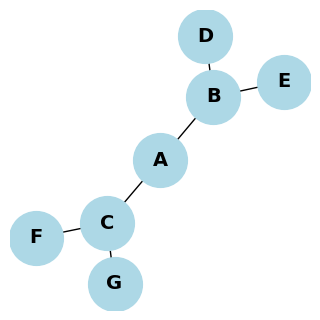

In [49]:
#그래프의 척도 확인
G = nx.Graph()
G.add_edges_from([('A','B'),('A','C'),('B','D'),('B','E'),('C','F'),('C','G')])
plt.figure(figsize=(3,3))
pos = nx.spring_layout(G,seed=42)
nx.draw(G,pos,
        with_labels=True,
        node_size=1500,
        node_color = 'lightblue',
        font_size = 14,
        font_weight='bold')
plt.show()

In [50]:
print(f'Degree Centrality = {nx.degree_centrality(G)}') #이웃이 얼마나 많은가? 
print(f'Closeness Centrality = {nx.closeness_centrality(G)}') #얼마나 중앙에 위치하는가?
print(f'Between Centrality = {nx.betweenness_centrality(G)}') #다른 노드와 연결 역할을 어느 정도로 하는가?

Degree Centrality = {'A': 0.3333333333333333, 'B': 0.5, 'C': 0.5, 'D': 0.16666666666666666, 'E': 0.16666666666666666, 'F': 0.16666666666666666, 'G': 0.16666666666666666}
Closeness Centrality = {'A': 0.6, 'B': 0.5454545454545454, 'C': 0.5454545454545454, 'D': 0.375, 'E': 0.375, 'F': 0.375, 'G': 0.375}
Between Centrality = {'A': 0.6, 'B': 0.6, 'C': 0.6, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0}


In [51]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
random.seed(0)

/opt/homebrew/Caskroom/miniconda/base/envs/dl/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


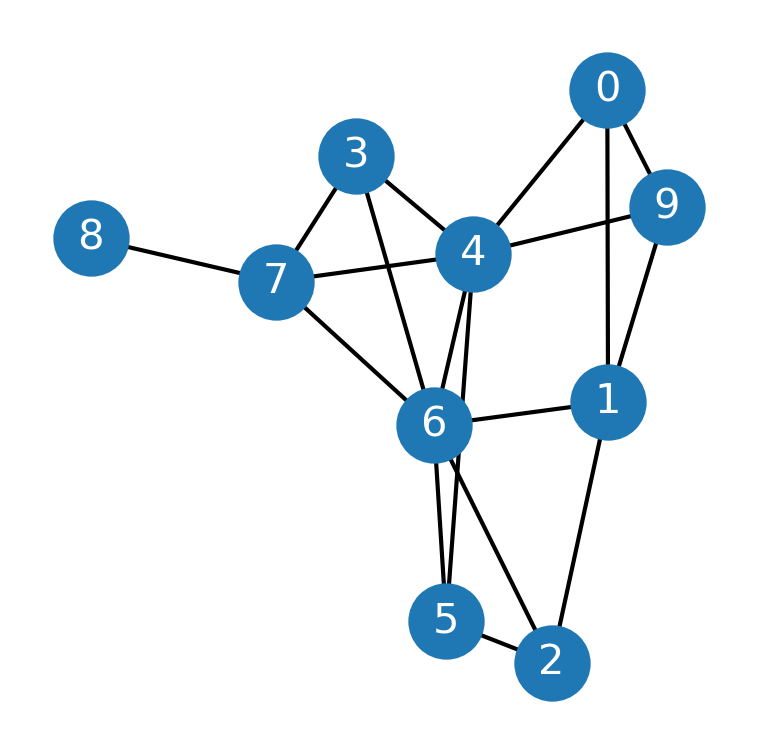

In [52]:
G = nx.erdos_renyi_graph(10,0.3,seed=1,directed=False)
plt.figure(figsize=(3,3),dpi=300)
plt.axis('off')
nx.draw_networkx(G,
                 pos=nx.spring_layout(G,seed=0),
                 cmap='coolwarm',
                 font_size=10,
                 font_color='white')

In [53]:
def random_walk(start,length):
    walk = [str(start)]

    for _ in range(length):
        neighbors = [node for node in G.neighbors(start)]
        next_node = random.choice(neighbors)
        walk.append(str(next_node))
        start = next_node
    
    return walk

In [65]:
print(random_walk(0,10)) #시작 노드가 0이고, 길이가 10인 랜덤워크

['0', '4', '6', '1', '6', '5', '4', '6', '3', '6', '3']


In [66]:
#딥워크 구현해보기

G = nx.karate_club_graph()

In [98]:
labels = []

for node in G.nodes():
    label = G.nodes[node]['club']
    labels.append(1 if label=='Officer' else 0)

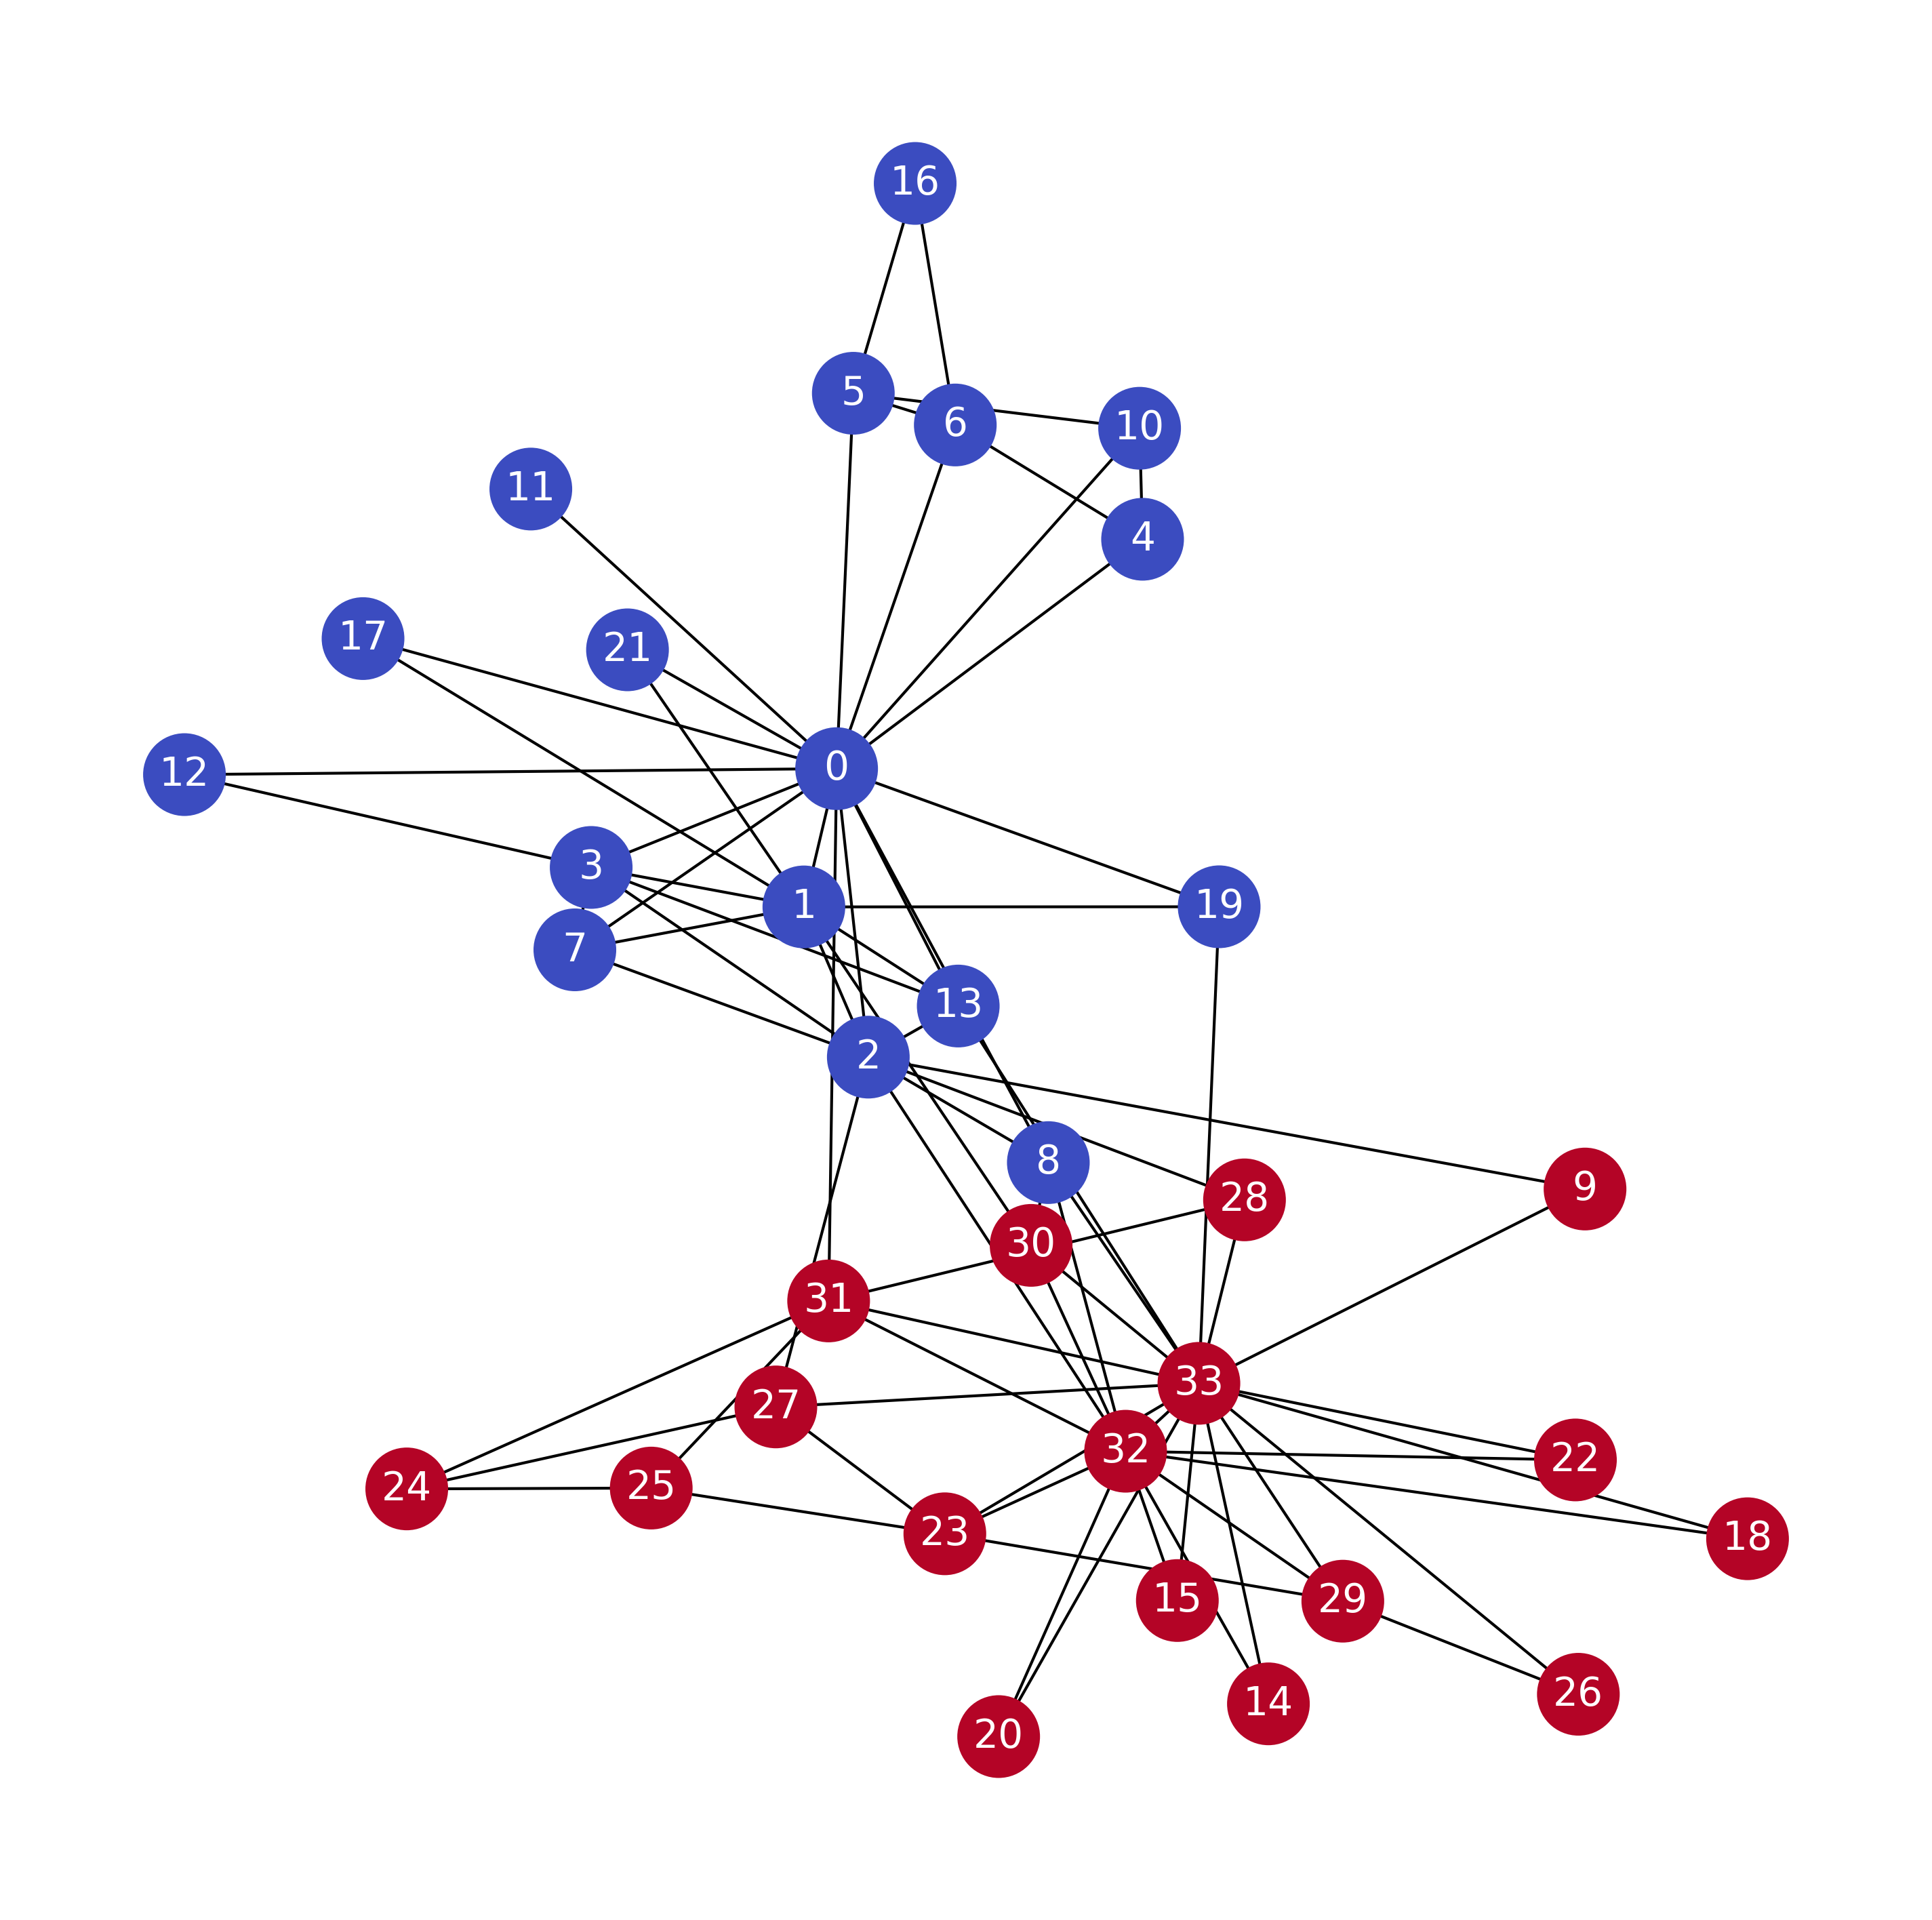

In [101]:
plt.figure(figsize=(12,12),dpi=300)
plt.axis('off')
nx.draw_networkx(G,
                 pos = nx.spring_layout(G,seed=0),
                 node_color=labels,
                 node_size=800,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white')

In [107]:
walks = []
for node in G.nodes:
    for _ in range(80):
        walks.append(random_walk(node,10))
print(walks)

[['0', '19', '0', '31', '32', '20', '33', '14', '33', '19', '33'], ['0', '19', '33', '19', '33', '15', '32', '18', '32', '15', '32'], ['0', '31', '24', '25', '24', '25', '24', '27', '33', '31', '0'], ['0', '13', '0', '3', '13', '1', '13', '3', '7', '2', '13'], ['0', '3', '1', '2', '1', '21', '0', '2', '28', '33', '28'], ['0', '21', '1', '17', '0', '2', '1', '0', '4', '0', '3'], ['0', '13', '3', '0', '1', '3', '7', '2', '0', '2', '9'], ['0', '5', '16', '6', '16', '6', '4', '0', '4', '0', '11'], ['0', '5', '10', '4', '6', '5', '0', '5', '10', '0', '12'], ['0', '1', '2', '8', '33', '30', '8', '32', '29', '23', '27'], ['0', '21', '0', '8', '0', '6', '16', '5', '0', '7', '3'], ['0', '13', '3', '7', '1', '19', '0', '5', '6', '0', '7'], ['0', '21', '0', '17', '0', '1', '19', '0', '4', '0', '5'], ['0', '21', '0', '1', '30', '32', '8', '30', '32', '20', '33'], ['0', '8', '0', '21', '0', '31', '33', '23', '27', '33', '20'], ['0', '17', '1', '19', '0', '10', '0', '6', '4', '10', '4'], ['0', '17',

In [119]:
!pip install -qU gensim

In [120]:
from gensim.models.word2vec import Word2Vec

In [121]:
model = Word2Vec(walks,
                 hs=1, #계층적 소프트맥스
                 sg=1, #스킵그램
                 vector_size=100,
                 window=10,
                 workers=2,
                 seed=0)

In [122]:
model.train(walks,total_examples=model.corpus_count,epochs=30,report_delay=1)

(186918, 897600)

In [ ]:
model.wv.most_similar(positive=['4']) #특정 노드와 가까운 노드 찾기

[('5', 0.8323574066162109),
 ('10', 0.7978715300559998),
 ('16', 0.7559155821800232),
 ('6', 0.7436554431915283),
 ('0', 0.6689872145652771),
 ('11', 0.5917743444442749),
 ('21', 0.4975112974643707),
 ('12', 0.47243183851242065),
 ('17', 0.4466973543167114),
 ('7', 0.3918830454349518)]

In [ ]:
model.wv.similarity('0','4') #두 노드의 유사도 측정

np.float32(0.66898715)

In [132]:
from sklearn.manifold import TSNE
nodes_wv = np.array([model.wv.get_vector(str(i)) for i in range(len(model.wv))]) #각 노드에 해당하는 임베딩 배열
labels = np.array(labels)

In [133]:
tsne = TSNE(n_components=2,
            learning_rate = 'auto',
            init='pca',
            random_state=0).fit_transform(nodes_wv)

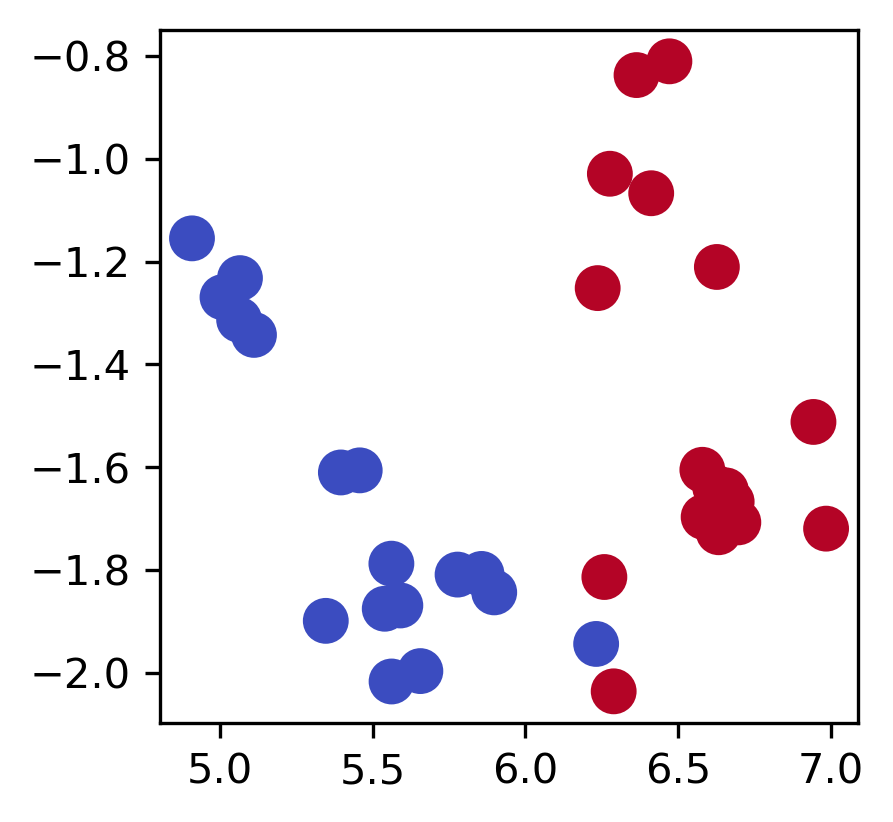

In [135]:
plt.figure(figsize=(3,3),dpi=300)
plt.scatter(tsne[:,0],tsne[:,1],s=100,c=labels,cmap='coolwarm')
plt.show()

In [137]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [138]:
train_mask = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28]
test_mask = [i for i in range(len(model.wv)) if i%2==1]

In [140]:
clf = RandomForestClassifier(random_state=0)
clf.fit(nodes_wv[train_mask],labels[train_mask])

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [141]:
y_pred = clf.predict(nodes_wv[test_mask])
accuracy_score(y_pred,labels[test_mask])

1.0